<a href="https://colab.research.google.com/github/yeseul106/UROP_Software-Fault-Prediction/blob/main/UROP_NN_CM1_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# csv 파일 읽어오기
CM1 = pd.read_csv('/content/drive/MyDrive/UROP/Dataset/CM1.csv', encoding='cp949', header=None)
print(CM1.shape)
CM1.head(5)

(498, 22)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [4]:
# 입력 데이터
input_data = CM1.loc[:,:20].to_numpy()
print("input_data shape : ",input_data.shape)

input_data shape :  (498, 21)


In [5]:
input_data[0]

array([1.1, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 2. ,
       2. , 2. , 2. , 1.2, 1.2, 1.2, 1.2, 1.4])

In [6]:
# 정답 레이블
y_label = CM1.loc[:,21].to_numpy()
print("y_label shape : ",y_label.shape)

y_label shape :  (498,)


In [7]:
y_label[0]

False

# **Feature Selection - Correlation**

- 21번 feature이 정답 레이블이므로 21번 열과 다른 열들의 상관계수를 파악
- 대부분의 feature이 0.2를 넘기 때문에 임계값을 0.2로 설정해보기


In [8]:
correlation = CM1.corr()
corr_features = correlation.index[abs(correlation[21])>=0.2]
print(corr_features)

Int64Index([0, 3, 4, 5, 8, 10, 13, 16, 17, 18, 19, 21], dtype='int64')


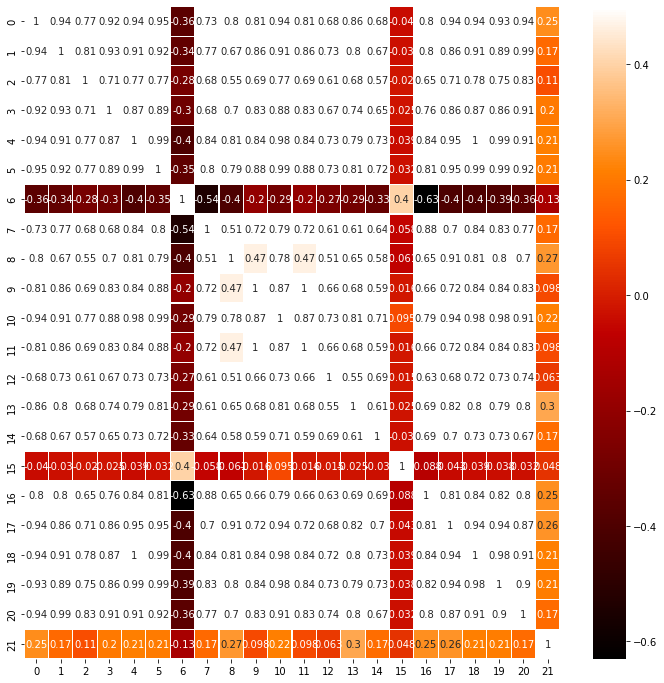

In [9]:
# 시각적으로 보기 위해 표를 이용하여 확인
import matplotlib.pyplot as plt
import seaborn as sns

#그래프 크기 결정
plt.figure(figsize=(12,12))
sns.heatmap(correlation,linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)
plt.show()

In [10]:
# 상관계수가 높은 feature만 추출
feature = [0,3,4,5,8,10,13,16,17,18,19]
input_data = CM1.iloc[:,feature]
print("input_data shape : ",input_data.shape)

input_data shape :  (498, 11)


In [11]:
input_data.head(5)

,0,3,4,5,8,10,13,16,17,18,19
0,1.1,1.4,1.3,1.30,1.30,1.30,2,1.2,1.2,1.2,1.2
1,1.0,1.0,1.0,1.00,1.00,1.00,1,1.0,1.0,1.0,1.0
2,24.0,3.0,63.0,309.13,32.54,0.10,0,15.0,15.0,44.0,19.0
3,20.0,2.0,47.0,215.49,13.47,0.07,0,16.0,8.0,31.0,16.0
4,24.0,2.0,72.0,346.13,19.97,0.12,0,16.0,12.0,46.0,26.0


In [12]:
# 레이블 벡터화 
y_label = np.asarray(y_label).astype('float32')

In [13]:
y_label.shape

(498,)

# **정규화 (Normalization)**

In [14]:
from sklearn import preprocessing

# 정규화 0-1로 하기
data_normalizer = preprocessing.MinMaxScaler() # 데이터를 0~1 범위로 점철되게 하는 함수 call
data_normalized = data_normalizer.fit_transform(input_data) # 데이터를 0~1 범위로 점철되게 함수 수행
data_normalized.shape

(498, 11)

In [15]:
data_normalized[0]

array([2.36966825e-04, 6.45161290e-03, 1.44648023e-04, 7.59156005e-05,
       4.42658676e-03, 2.27670753e-01, 5.89970501e-03, 2.81690141e-03,
       3.82165605e-03, 1.58730159e-04, 1.47420147e-03])

# **TrainData와 TestData의 분리**

In [16]:
from sklearn.model_selection import train_test_split

#학습셋과 테스트셋의 구분
seed=0
X_train, X_test, Y_train, Y_test = train_test_split(data_normalized,y_label, test_size =0.3, random_state = seed)

print("X_train의 shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train의 shape: (348, 11)
X_test shape: (150, 11)
Y_train shape: (348,)
Y_test shape: (150,)


# **모델 설계**

# **실험 1**
- epoch : 100
- optimizer : rmsprop

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(11,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

In [18]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=7, verbose=1)

Epoch 1/100
50/50 [==============================] - 2s 7ms/step - loss: 0.5594 - accuracy: 0.8678 - val_loss: 0.4193 - val_accuracy: 0.9000
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.9023 - val_loss: 0.3946 - val_accuracy: 0.9000
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.9023 - val_loss: 0.3661 - val_accuracy: 0.9000
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.9023 - val_loss: 0.3558 - val_accuracy: 0.9000
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4289 - accuracy: 0.9023 - val_loss: 0.3356 - val_accuracy: 0.9000
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.9023 - val_loss: 0.3261 - val_accuracy: 0.9000
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.9023 - val_loss: 0.3168 - val_accuracy: 0.9000
Epoch 8/100
5

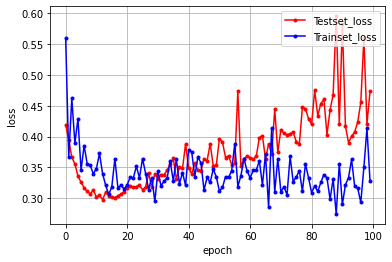

In [20]:
#그래프 그려보기

import matplotlib.pyplot as plt
%matplotlib inline

#loss 그래프
history_dict = hist.history
auc = history_dict['loss']
val_auc = history_dict['val_loss']

x_len = np.arange(len(auc))
plt.plot(x_len, val_auc, marker='.', c="red", label = "Testset_loss")
plt.plot(x_len, auc, marker='.', c="blue", label = "Trainset_loss")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

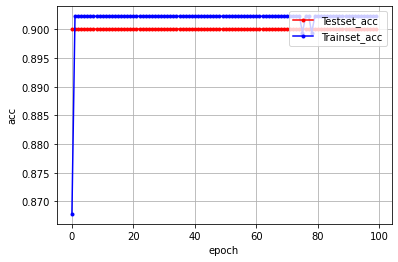

In [21]:

#accuracy 그래프
history_dict = hist.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

x_len = np.arange(len(auc))
plt.plot(x_len, val_acc, marker='.', c="red", label = "Testset_acc")
plt.plot(x_len, acc, marker='.', c="blue", label = "Trainset_acc")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

# **AUC로 정확도 계산**

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(11,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

In [23]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['AUC'])

In [24]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=7, verbose=1)

Epoch 1/100
50/50 [==============================] - 2s 10ms/step - loss: 0.5137 - auc: 0.5506 - val_loss: 0.3860 - val_auc: 0.2805
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4239 - auc: 0.3792 - val_loss: 0.3634 - val_auc: 0.2709
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3941 - auc: 0.3862 - val_loss: 0.3519 - val_auc: 0.2877
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4202 - auc: 0.3865 - val_loss: 0.3397 - val_auc: 0.4501
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3760 - auc: 0.5362 - val_loss: 0.3260 - val_auc: 0.6267
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3750 - auc: 0.4664 - val_loss: 0.3276 - val_auc: 0.6785
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3627 - auc: 0.5436 - val_loss: 0.3179 - val_auc: 0.6632
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3516 - 

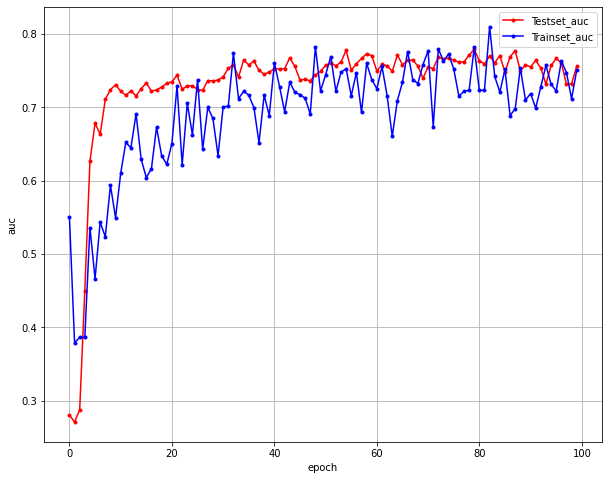

In [25]:
#그래프 그려보기

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))

#loss 그래프
history_dict = hist.history
auc = history_dict['auc']
val_auc = history_dict['val_auc']

x_len = np.arange(len(auc))
plt.plot(x_len, val_auc, marker='.', c="red", label = "Testset_auc")
plt.plot(x_len, auc, marker='.', c="blue", label = "Trainset_auc")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('auc')
plt.show()

In [26]:
print("\n Test AUC : %.4f" % (model.evaluate(X_test, Y_test)[1]))

5/5 [==============================] - 0s 3ms/step - loss: 0.3891 - auc: 0.7560

 Test AUC : 0.7560


In [27]:
print("\n Train AUC : %.4f" % (model.evaluate(X_train, Y_train)[1]))

11/11 [==============================] - 0s 2ms/step - loss: 0.2557 - auc: 0.8306

 Train AUC : 0.8306


# **실험 2**
- epoch : 200
- optimizer : adam 함수

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(11,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

In [34]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['AUC'])

In [35]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=7, verbose=1)

Epoch 1/200
50/50 [==============================] - 2s 9ms/step - loss: 0.5528 - auc: 0.4078 - val_loss: 0.3923 - val_auc: 0.2877
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3820 - auc: 0.4115 - val_loss: 0.3346 - val_auc: 0.4049
Epoch 3/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3573 - auc: 0.4880 - val_loss: 0.3161 - val_auc: 0.7074
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3391 - auc: 0.5316 - val_loss: 0.3126 - val_auc: 0.7331
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3328 - auc: 0.5541 - val_loss: 0.3039 - val_auc: 0.7516
Epoch 6/200
50/50 [==============================] - 0s 5ms/step - loss: 0.3399 - auc: 0.5740 - val_loss: 0.3079 - val_auc: 0.7477
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3351 - auc: 0.5764 - val_loss: 0.3016 - val_auc: 0.7514
Epoch 8/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3302 - a

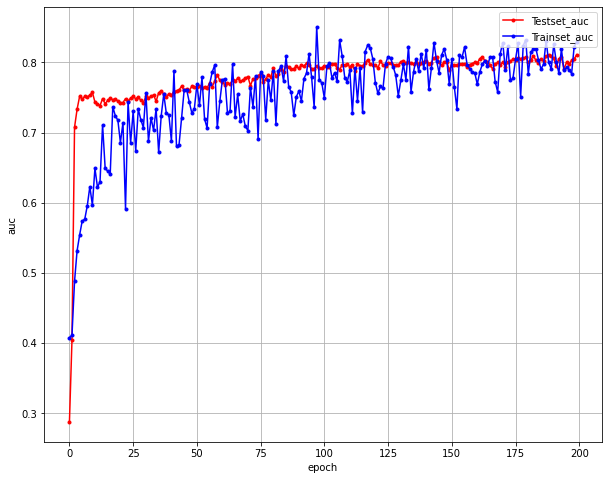

In [36]:
#그래프 그려보기

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))

#loss 그래프
history_dict = hist.history
auc = history_dict['auc']
val_auc = history_dict['val_auc']

x_len = np.arange(len(auc))
plt.plot(x_len, val_auc, marker='.', c="red", label = "Testset_auc")
plt.plot(x_len, auc, marker='.', c="blue", label = "Trainset_auc")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('auc')
plt.show()

In [37]:
print("\n Train AUC : %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n Test AUC : %.4f" % (model.evaluate(X_test, Y_test)[1]))

11/11 [==============================] - 0s 2ms/step - loss: 0.2386 - auc: 0.8535

 Train AUC : 0.8535
5/5 [==============================] - 0s 4ms/step - loss: 0.4156 - auc: 0.8109

 Test AUC : 0.8109


In [46]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(11,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

In [47]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [49]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=7, verbose=1)

Epoch 1/200
50/50 [==============================] - 1s 6ms/step - loss: 0.5714 - accuracy: 0.8448 - val_loss: 0.3991 - val_accuracy: 0.9000
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.9023 - val_loss: 0.3337 - val_accuracy: 0.9000
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3618 - accuracy: 0.9023 - val_loss: 0.3192 - val_accuracy: 0.9000
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.9023 - val_loss: 0.3120 - val_accuracy: 0.9000
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3279 - accuracy: 0.9023 - val_loss: 0.3063 - val_accuracy: 0.9000
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3377 - accuracy: 0.9023 - val_loss: 0.3027 - val_accuracy: 0.9000
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.9023 - val_loss: 0.3003 - val_accuracy: 0.9000
Epoch 8/200
5

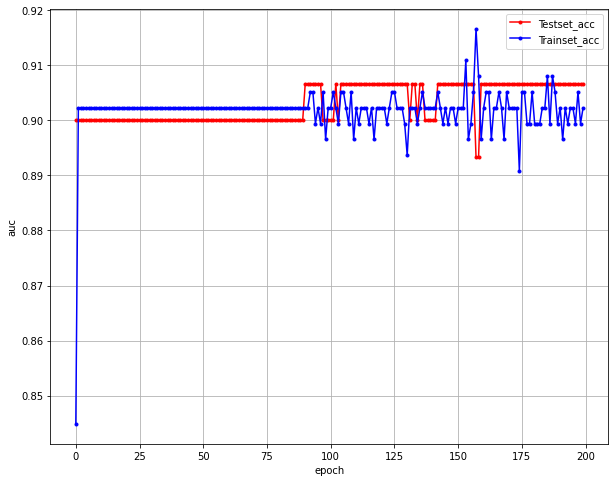

In [51]:
#그래프 그려보기

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))

#loss 그래프
history_dict = hist.history
auc = history_dict['accuracy']
val_auc = history_dict['val_accuracy']

x_len = np.arange(len(auc))
plt.plot(x_len, val_auc, marker='.', c="red", label = "Testset_acc")
plt.plot(x_len, auc, marker='.', c="blue", label = "Trainset_acc")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('auc')
plt.show()

In [52]:
print("\n Train Acc : %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n Test Acc : %.4f" % (model.evaluate(X_test, Y_test)[1]))

11/11 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9023

 Train Acc : 0.9023
5/5 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.9067

 Test Acc : 0.9067
